<a href="https://colab.research.google.com/github/yuguerten/traffic_prediction_using_CNN/blob/master/Traffic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description**

**Context**
Traffic congestion is rising in cities around the world. Contributing factors include expanding urban populations, aging infrastructure, inefficient and uncoordinated traffic signal timing, and a lack of real-time data.

The impacts are significant. Traffic data and analytics company INRIX estimates that traffic congestion cost U.S. commuters $305 billion in 2017 due to wasted fuel, lost time, and the increased cost of transporting goods through congested areas. Given the physical and financial limitations around building additional roads, cities must use new strategies and technologies to improve traffic conditions.

**Content**
This dataset contains 48.1k (48120) observations of the number of vehicles each hour in four different junctions:
1. DateTime
2. Junction
3. Vehicles
4. ID

**About the Data**
The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. Some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections.
 https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset

---


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
traffic_data = pd.read_csv('traffic.csv',encoding='UTF-8')

In [3]:
traffic_data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
traffic_data['Junction'].unique()

array([1, 2, 3, 4])

In [6]:
traffic_viz = traffic_data.copy()

**Daily traffic recorded during 2015 , 2016 and 2017 visualization**

In [7]:
traffic_viz.head()
traffic_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


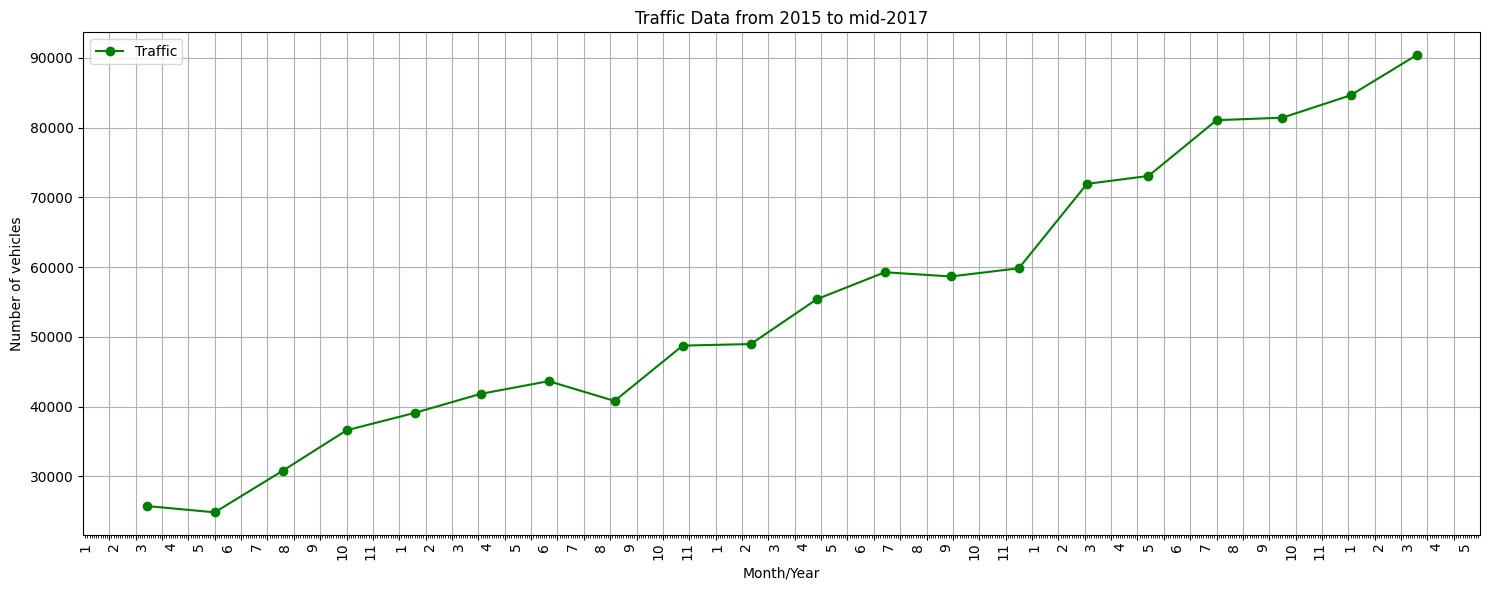

In [8]:

traffic_viz['DateTime'] = pd.to_datetime(traffic_viz['DateTime'], format='%Y-%m-%d %H:%M:%S')

# Filter data for the years 2015, 2016, and until 6/30/2017 11:00:00 PM
end_date = pd.to_datetime('6/30/2017 23:59:59')
filtered_data = traffic_viz[(traffic_viz['DateTime'] >= '2015-01-01') & (traffic_viz['DateTime'] <= end_date)]

# Recreate the monthly data as per the original steps
monthly_data = filtered_data.set_index('DateTime').resample('M').sum()

# Plotting with only the year at the start and 12 months within each year
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(monthly_data.index, monthly_data['Vehicles'], color='green', marker='o', linestyle='-', label='Traffic')

# Adding labels and title
ax.set_xlabel('Month/Year')
ax.set_ylabel('Number of vehicles')
ax.set_title('Traffic Data from 2015 to mid-2017')

# Displaying the legend
ax.legend()

# Displaying the grid
ax.grid(True)

# Customizing x-axis ticks to represent months and years appropriately
# Set major ticks to the first month of each year (January) to display the year
ax.xaxis.set_major_locator(plt.MultipleLocator(12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: str(int(x/12) + 2015)))

# Set minor ticks to months
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_formatter(plt.FuncFormatter(lambda x, pos: str(int(x % 12)) if int(x % 12) != 0 else '12'))

# Hide the major tick labels (years) and only show the minor tick labels (months)
plt.setp(ax.xaxis.get_majorticklabels(), visible=False)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)

# Ensure that each month is labeled with the corresponding month number
ticks = ax.xaxis.get_minor_ticks()
for i in range(len(ticks)):
    if i % 12 != 0:  # This will hide every label that is not January (which are the major ticks)
        ticks[i].label1.set_visible(False)

plt.tight_layout()
plt.show()




In [9]:
import seaborn as sns
traffic_viz["Year"]= traffic_viz['DateTime'].dt.year
traffic_viz["month"]= traffic_viz['DateTime'].dt.month
traffic_viz["Day"]= traffic_viz.DateTime.dt.strftime("%A")
traffic_viz["hour"]= traffic_viz['DateTime'].dt.hour

In [10]:
traffic_viz.head()
traffic_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
 4   Year      48120 non-null  int64         
 5   month     48120 non-null  int64         
 6   Day       48120 non-null  object        
 7   hour      48120 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 2.9+ MB


Text(0.5, 0, 'Date')

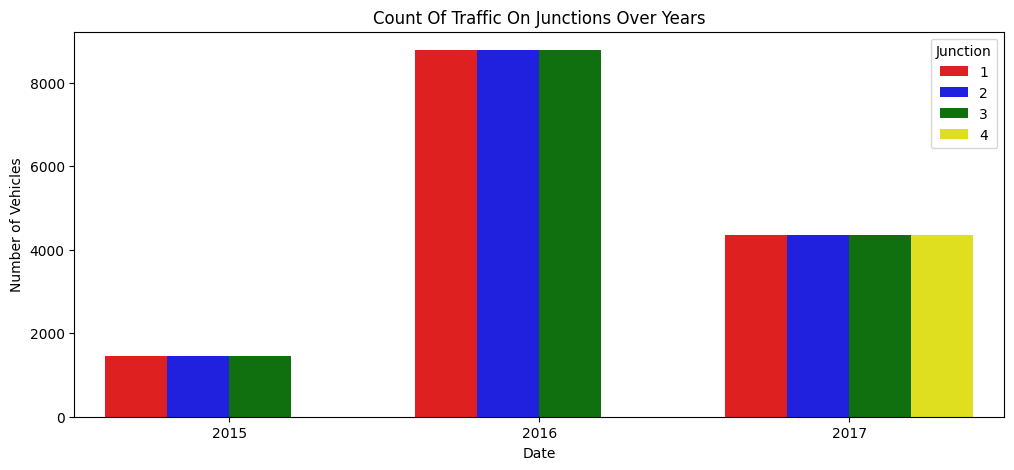

In [11]:

plt.figure(figsize=(12,5))
colors = ['red', 'blue', 'green', 'yellow']
count = sns.countplot(data=traffic_viz, x=traffic_viz["Year"], hue="Junction" , palette = colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")


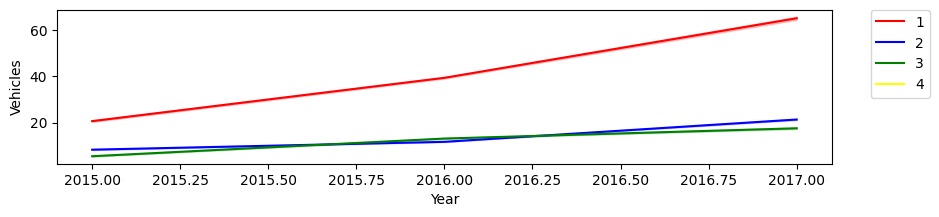

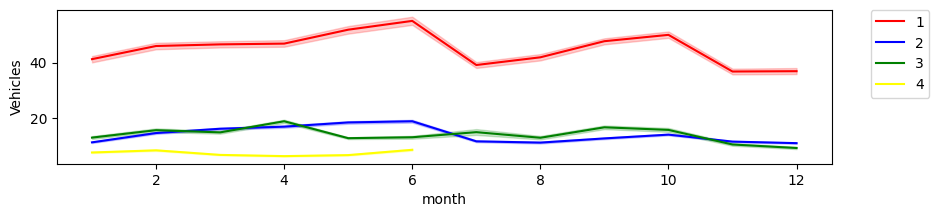

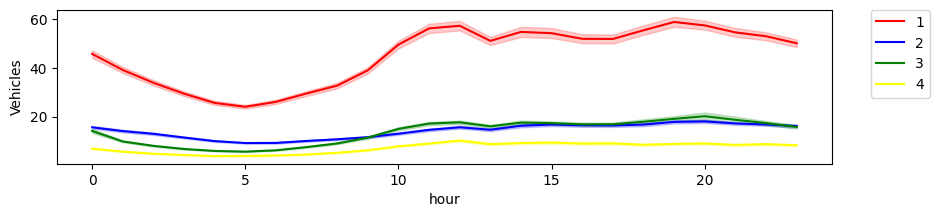

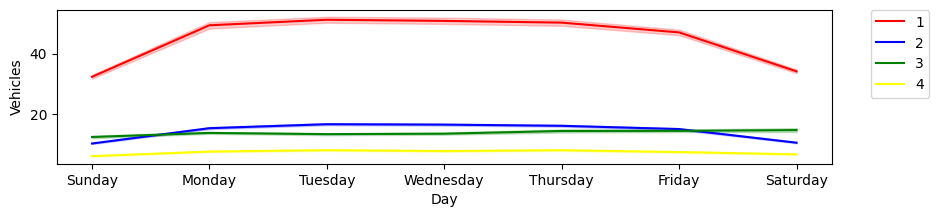

In [12]:
new_features = [ "Year","month","hour", "Day"]
colors = ['red', 'blue', 'green', 'yellow']
for i in new_features:
    plt.figure(figsize=(10,2))
    ax=sns.lineplot(x=traffic_viz[i],y="Vehicles",data=traffic_viz, hue="Junction" ,palette = colors)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

*Interpretation*

*   **diagram 1 ( YEAR )** : The traffic data analysis over the years indicates that the 1st junction consistently experiences higher traffic compared to other junctions.junction and will have more vehicles circled in the future.
*  **Diagram 2 ( MONTHS )** : Examining the monthly trends reveals that the 1st junction is particularly congested during the summer season.
*    **Diagram 3 ( Hour )** :  The analysis of hourly traffic patterns shows that the 1st junction experiences higher congestion in the afternoons and evenings.
*   **Diagram 4 ( DAY )** : On weekends, there is a noticeable decrease in the number of vehicles at the junctions.






<ipython-input-13-78632cc471f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = traffic_viz.corr()


<Axes: >

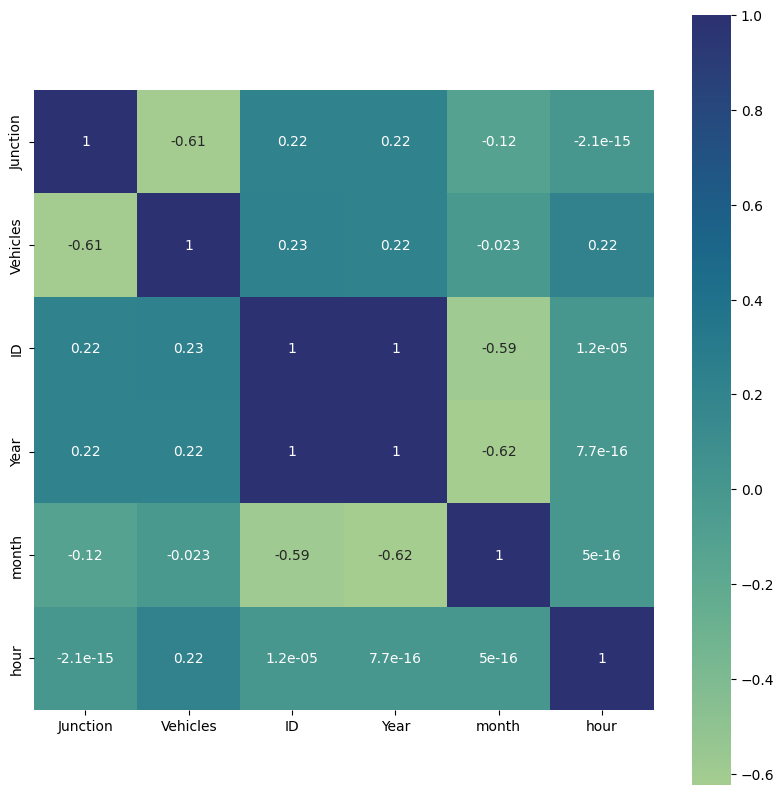

In [13]:
correlation_matrix = traffic_viz.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,cmap= "crest",annot=True,square=True, )

*interpretation* :The correlation matrix reveals valuable insights into the relationships between different variables. In particular, we observe a negative correlation between the '**Vehicles**' and '**Junction**' variables. This negative correlation indicates that as the number of vehicles increases, the junction number tends to decrease.

This information is crucial for traffic management strategies. Focusing on the 1st junction, where congestion is more pronounced, becomes a priority.

**Data Transformation And Preprocessing**


In [14]:
df_J = traffic_data.pivot(columns="Junction", index="DateTime")
df_J.describe()

Vehicles                                                     ID  \
Junction             1             2             3            4             1   
count     14592.000000  14592.000000  14592.000000  4344.000000  1.459200e+04   
mean         45.052906     14.253221     13.694010     7.251611  2.016260e+10   
std          23.008345      7.401307     10.436005     3.521455  5.779594e+06   
min           5.000000      1.000000      1.000000     1.000000  2.015110e+10   
25%          27.000000      9.000000      7.000000     5.000000  2.016038e+10   
50%          40.000000     13.000000     11.000000     7.000000  2.016083e+10   
75%          59.000000     17.000000     18.000000     9.000000  2.017013e+10   
max         156.000000     48.000000    180.000000    36.000000  2.017063e+10   

                                                    
Junction             2             3             4  
count     1.459200e+04  1.459200e+04  4.344000e+03  
mean      2.016260e+10  2.016260e+10  2.017037e+10  
std       5.779594e+06  5.779594e+06  1.712987e+05  
min       2.015110e+10  2.015110e+10  2.017010e+10  
25%       2.016038e+10  2.016038e+10  2.017022e+10  
50%       2.016083e+10  2.016083e+10  2.017040e+10  
75%       2.017013e+10  2.017013e+10  2.017052e+10  
max       2.017063e+10  2.017063e+10  2.017063e+10

In [15]:
# Assuming 'df' is your DataFrame
df_J = df_J.drop('ID', axis=1, level=0)


In [16]:
df_J.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14592 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Vehicles, 1)  14592 non-null  float64
 1   (Vehicles, 2)  14592 non-null  float64
 2   (Vehicles, 3)  14592 non-null  float64
 3   (Vehicles, 4)  4344 non-null   float64
dtypes: float64(4)
memory usage: 570.0+ KB


In [17]:
df_J.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

*we need to clean our data 1st and transform it (NAN values in our dataset)*

In [18]:
df_J.head()

Vehicles              
Junction                   1    2    3   4
DateTime                                  
2015-11-01 00:00:00     15.0  6.0  9.0 NaN
2015-11-01 01:00:00     13.0  6.0  7.0 NaN
2015-11-01 02:00:00     10.0  5.0  5.0 NaN
2015-11-01 03:00:00      7.0  6.0  1.0 NaN
2015-11-01 04:00:00      9.0  7.0  2.0 NaN

In [19]:
df_junction1 = df_J[[('Vehicles', 1)]]

In [20]:
df_junction2 = df_J[[('Vehicles', 2)]]

In [21]:
df_junction3 = df_J[[('Vehicles', 3)]]

*we won't use the junction 4 because it doesn't hold a significant amount of data*

In [22]:
#now let's plot our data before the transformation

#Dropping level one in dfs's index as it is a multi index data frame
list_dfs = [df_junction1, df_junction2, df_junction3]
for i in list_dfs:
    i.columns= i.columns.droplevel(level=1)

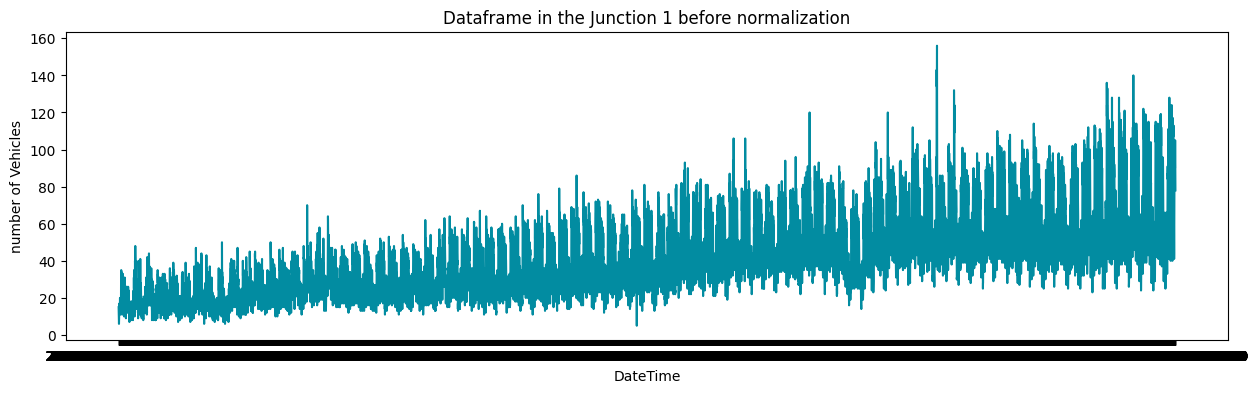

In [23]:

plt.figure(figsize=(15, 4))
plt.title("Dataframe in the Junction 1 before normalization")
sns.lineplot(data=df_junction1['Vehicles'], color='#028ca1')
plt.ylabel("number of Vehicles")
plt.show()


# New Section

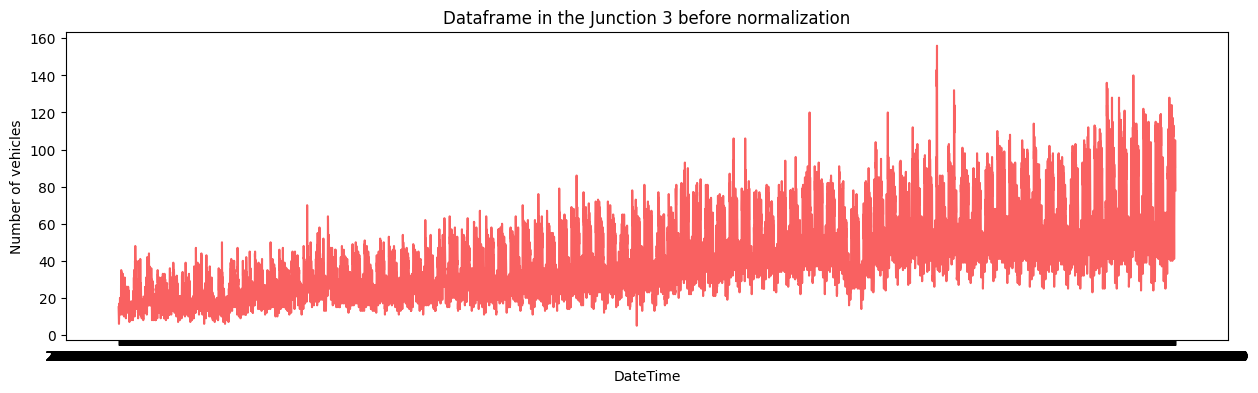

In [24]:
plt.figure(figsize=(15, 4))
plt.title("Dataframe in the Junction 3 before normalization")
sns.lineplot(data=df_junction1['Vehicles'], color='#f96161')
plt.ylabel("Number of vehicles")
plt.show()


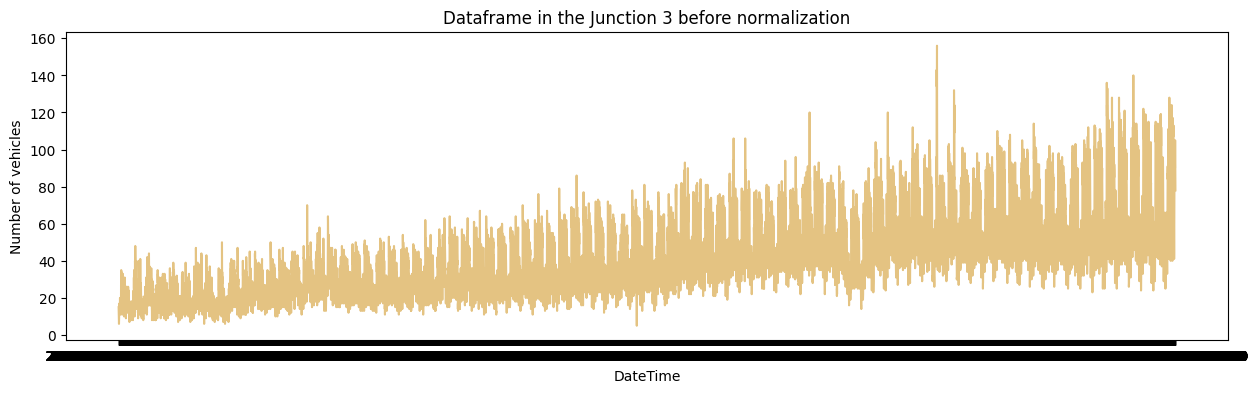

In [25]:
plt.figure(figsize=(15, 4))
plt.title("Dataframe in the Junction 3 before normalization")
sns.lineplot(data=df_junction1['Vehicles'], color='#e4c382')
plt.ylabel("Number of vehicles")
plt.show()


In [26]:
normalized_df1=(df_junction1-df_junction1.mean())/df_junction1.std()
normalized_df2=(df_junction2-df_junction2.mean())/df_junction2.std()
normalized_df3=(df_junction3-df_junction3.mean())/df_junction3.std()

In [27]:
normalized_df1.describe()

,Vehicles
count,1.459200e+04
mean,1.246566e-16
std,1.000000e+00
min,-1.740799e+00
25%,-7.846243e-01
50%,-2.196119e-01
75%,6.061755e-01
max,4.822037e+00


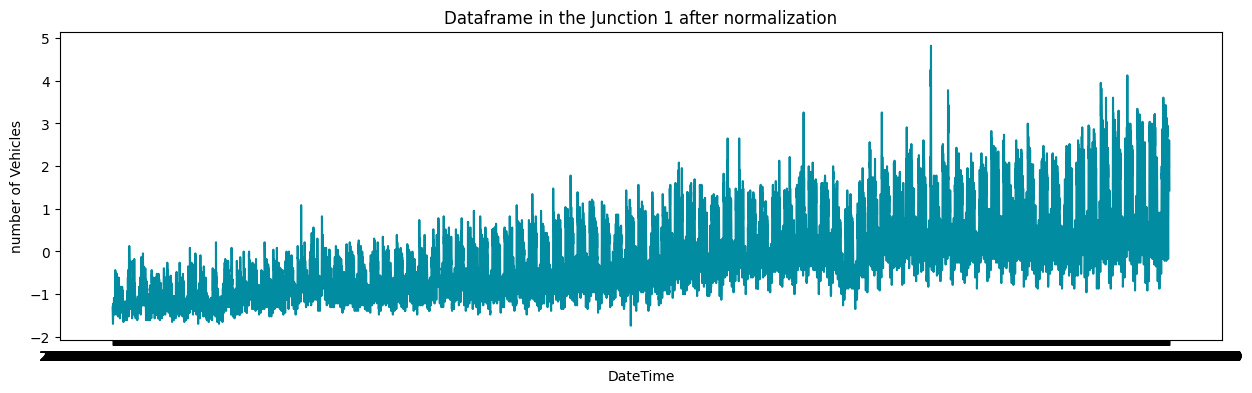

In [28]:
plt.figure(figsize=(15, 4))
plt.title("Dataframe in the Junction 1 after normalization")
sns.lineplot(data=normalized_df1['Vehicles'], color='#028ca1')
plt.ylabel("number of Vehicles")
plt.show()


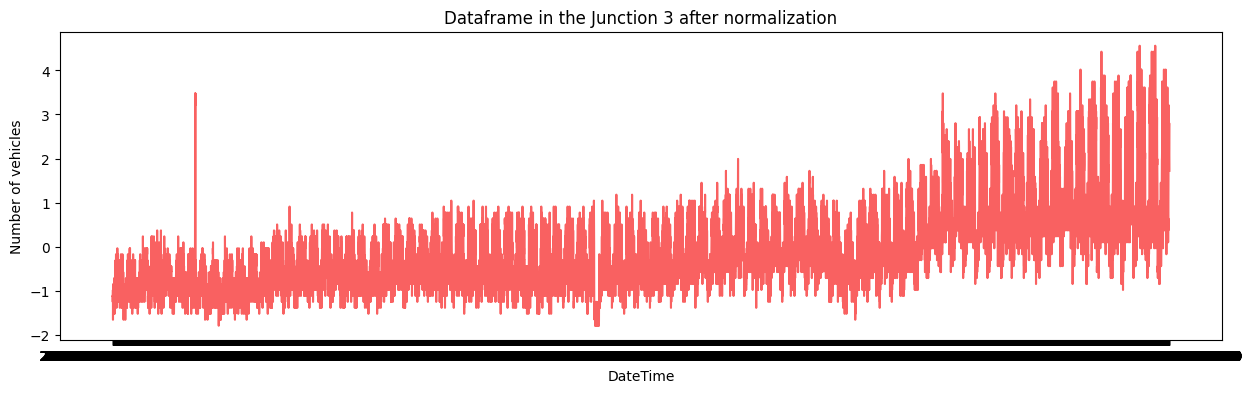

In [29]:
plt.figure(figsize=(15, 4))
plt.title("Dataframe in the Junction 3 after normalization")
sns.lineplot(data=normalized_df2['Vehicles'], color='#f96161')
plt.ylabel("Number of vehicles")
plt.show()

# MODEL BUILDING

In [30]:
import tensorflow
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import numpy as np
from sklearn.metrics import mean_squared_error

In [31]:
#Splitting the dataset
def Split_data(df):
    training_size = int(len(df)*0.90)
    data_len = len(df)
    train, test = df[0:training_size],df[training_size:data_len]
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test
#Splitting the training and test datasets
J1_train, J1_test = Split_data(normalized_df1)
J2_train, J2_test = Split_data(normalized_df2)
J3_train, J3_test = Split_data(normalized_df3)

In [32]:
#Target and Feature
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    return X ,y

#fixing the shape of X_test and X_train
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    return train, test

#Assigning features and target
X_trainJ1, y_trainJ1 = TnF(J1_train)
X_testJ1, y_testJ1 = TnF(J1_test)
X_trainJ1, X_testJ1 = FeatureFixShape(X_trainJ1, X_testJ1)

X_trainJ2, y_trainJ2 = TnF(J2_train)
X_testJ2, y_testJ2 = TnF(J2_test)
X_trainJ2, X_testJ2 = FeatureFixShape(X_trainJ2, X_testJ2)

X_trainJ3, y_trainJ3 = TnF(J3_train)
X_testJ3, y_testJ3 = TnF(J3_test)
X_trainJ3, X_testJ3 = FeatureFixShape(X_trainJ3, X_testJ3)


In [33]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)

In [34]:
def CNN_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)

    #The CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_Train.shape[1],1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(units=1))

    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, validation_data=(X_Test, y_Test), epochs=100, batch_size=120,callbacks=[early_stopping])
    pred_CNN = model.predict(X_Test)
    return pred_CNN


In [35]:
#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5))
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted, color="#627D78",label="Predicted Values")
    plt.title("CNN Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

In [36]:
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

# Fitting the model

In [37]:
#Predictions For First Junction
PredJ1 = CNN_model(X_trainJ1,y_trainJ1,X_testJ1,y_testJ1)

Epoch 1/100
110/110 [==============================] - 4s 22ms/step - loss: 0.1524 - val_loss: 0.3983
Epoch 2/100
110/110 [==============================] - 3s 32ms/step - loss: 0.0674 - val_loss: 0.4301
Epoch 3/100
110/110 [==============================] - 2s 20ms/step - loss: 0.0574 - val_loss: 0.3883
Epoch 4/100
110/110 [==============================] - 2s 19ms/step - loss: 0.0517 - val_loss: 0.2758
Epoch 5/100
110/110 [==============================] - 2s 18ms/step - loss: 0.0505 - val_loss: 0.3669
Epoch 6/100
110/110 [==============================] - 2s 19ms/step - loss: 0.0490 - val_loss: 0.2768
Epoch 7/100
110/110 [==============================] - 2s 21ms/step - loss: 0.0474 - val_loss: 0.2599
Epoch 8/100
110/110 [==============================] - 3s 31ms/step - loss: 0.0468 - val_loss: 0.3861
Epoch 9/100
110/110 [==============================] - 2s 19ms/step - loss: 0.0463 - val_loss: 0.2499
Epoch 10/100
110/110 [==============================] - 2s 20ms/step - loss: 0.044

The root mean squared error is 0.4632219009545532.


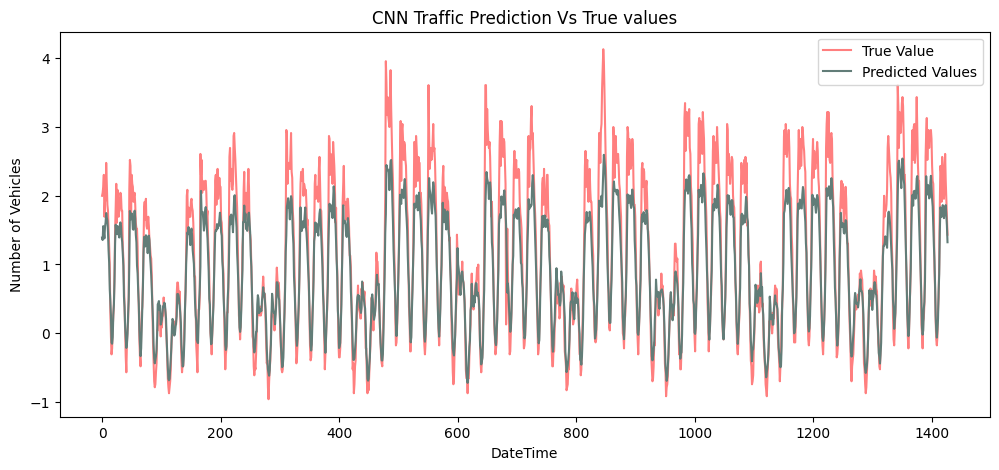

In [38]:
RMSE_J1 = RMSE_Value(y_testJ1, PredJ1)
PredictionsPlot(y_testJ1, PredJ1, 0)

In [39]:
#Predictions For Second Junction
PredJ2 = CNN_model(X_trainJ2,y_trainJ2,X_testJ2,y_testJ2)

Epoch 1/100
110/110 [==============================] - 3s 22ms/step - loss: 0.1954 - val_loss: 0.9320
Epoch 2/100
110/110 [==============================] - 3s 25ms/step - loss: 0.1266 - val_loss: 0.5584
Epoch 3/100
110/110 [==============================] - 3s 25ms/step - loss: 0.1187 - val_loss: 0.6552
Epoch 4/100
110/110 [==============================] - 2s 18ms/step - loss: 0.1143 - val_loss: 0.6074
Epoch 5/100
110/110 [==============================] - 2s 18ms/step - loss: 0.1130 - val_loss: 0.5593
Epoch 6/100
110/110 [==============================] - 2s 19ms/step - loss: 0.1120 - val_loss: 0.7706
Epoch 7/100
110/110 [==============================] - 2s 18ms/step - loss: 0.1080 - val_loss: 0.5062
Epoch 8/100
110/110 [==============================] - 3s 27ms/step - loss: 0.1072 - val_loss: 0.7055
Epoch 9/100
110/110 [==============================] - 3s 24ms/step - loss: 0.1075 - val_loss: 0.5551
Epoch 10/100
110/110 [==============================] - 2s 20ms/step - loss: 0.106

The root mean squared error is 0.5796279547750649.


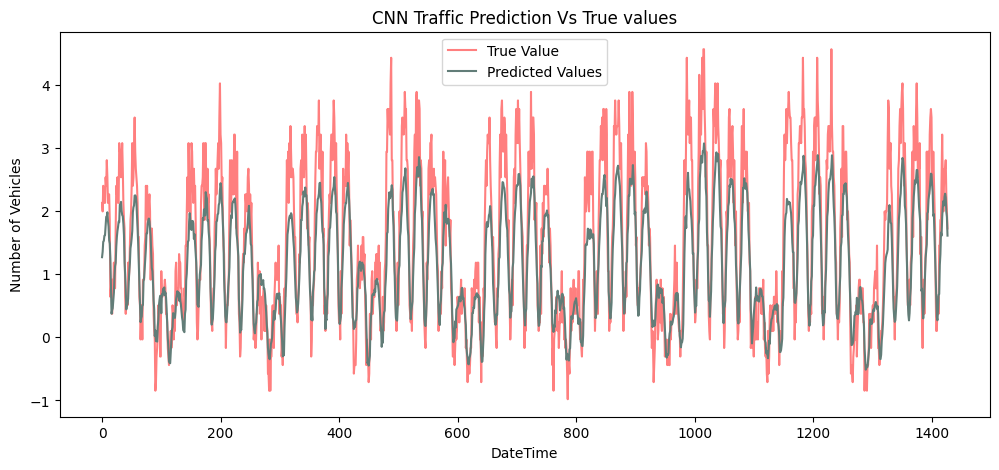

In [40]:
RMSE_J2 = RMSE_Value(y_testJ1, PredJ2)
PredictionsPlot(y_testJ2, PredJ2, 0)

In [41]:
#Predictions For third Junction
PredJ3 = CNN_model(X_trainJ3,y_trainJ3,X_testJ3,y_testJ3)

Epoch 1/100
110/110 [==============================] - 5s 31ms/step - loss: 0.4068 - val_loss: 0.4003
Epoch 2/100
110/110 [==============================] - 2s 20ms/step - loss: 0.3128 - val_loss: 0.3749
Epoch 3/100
110/110 [==============================] - 2s 18ms/step - loss: 0.2862 - val_loss: 0.3433
Epoch 4/100
110/110 [==============================] - 2s 19ms/step - loss: 0.2928 - val_loss: 0.3291
Epoch 5/100
110/110 [==============================] - 2s 21ms/step - loss: 0.2774 - val_loss: 0.3806
Epoch 6/100
110/110 [==============================] - 4s 32ms/step - loss: 0.2872 - val_loss: 0.3323
Epoch 7/100
110/110 [==============================] - 2s 20ms/step - loss: 0.2781 - val_loss: 0.3377
Epoch 8/100
110/110 [==============================] - 2s 19ms/step - loss: 0.2647 - val_loss: 0.3393
Epoch 9/100
110/110 [==============================] - 2s 19ms/step - loss: 0.2599 - val_loss: 0.3512
Epoch 10/100
110/110 [==============================] - 2s 19ms/step - loss: 0.291

The root mean squared error is 0.567479255470763.


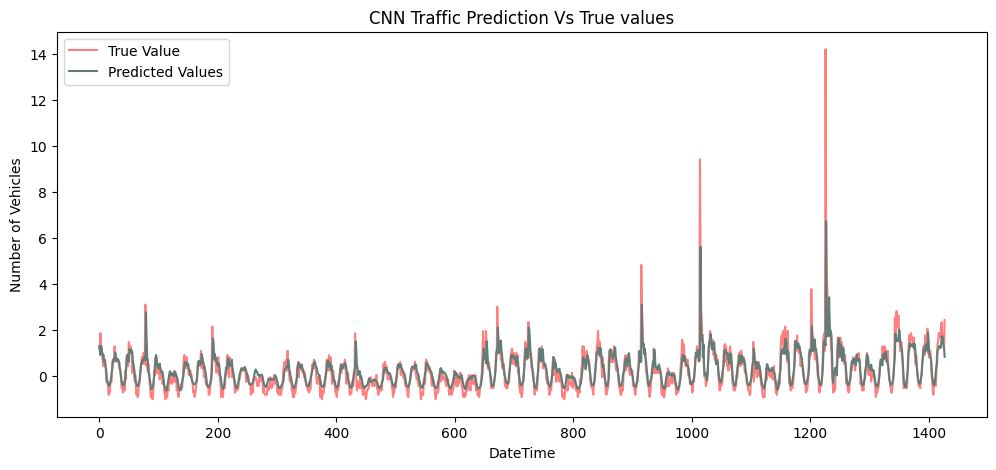

In [42]:
RMSE_J3 = RMSE_Value(y_testJ3, PredJ3)
PredictionsPlot(y_testJ3, PredJ3, 0)